In [59]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [60]:
df=pd.read_csv("logstc1.csv")
print(df.head())
dff=df.drop(columns={"Chance of Admit "})
print(dff.head())
print(dff.describe())
dff.shape
dff

   Serial No.  GRE_Score  TOEFL_Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
   Serial No.  GRE_Score  TOEFL_Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [61]:
dff["Research"].value_counts()

1    219
0    181
Name: Research, dtype: int64

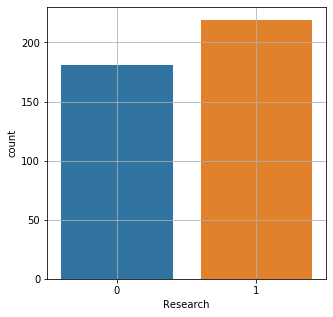

In [63]:
pl.figure(figsize=(5,5))
sns.countplot(x="Research",data=dff)
pl.grid()
pl.show()


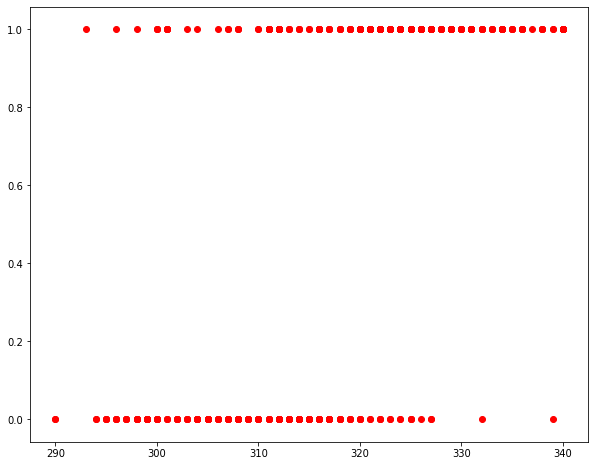

In [31]:
x=dff.iloc[:,:-1]
y=dff.iloc[:,-1]
pl.figure(figsize=(10,8))
pl.scatter(dff.loc[:,"GRE_Score"],dff.loc[:,"Research"],marker="o",color="r")
pl.show()

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)
y_pdf=pd.DataFrame({"predicted":y_pred})
pd.concat([x_test,y_pdf],axis=1,join="inner")

c:\users\rinsu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,predicted
29,30,310,99,2,1.5,2.0,7.30,1
5,6,330,115,5,4.5,3.0,9.34,0
78,79,296,95,2,3.0,2.0,7.54,1
17,18,319,106,3,4.0,3.0,8.00,1
4,5,314,103,2,2.0,3.0,8.21,1
6,7,321,109,3,3.0,4.0,8.20,0
58,59,300,99,1,3.0,2.0,6.80,1
62,63,304,105,2,3.0,3.0,8.20,1
65,66,325,112,4,3.5,3.5,8.92,1
18,19,318,110,3,4.0,3.0,8.80,0


In [65]:
print("Accuracy=",logr.score(x_test,y_test))
print(classification_report(y_test,y_pred))


Accuracy= 0.675
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        34
           1       0.71      0.74      0.72        46

    accuracy                           0.68        80
   macro avg       0.67      0.66      0.66        80
weighted avg       0.67      0.68      0.67        80



In [67]:
confusion_matrix(y_test,y_pred)

array([[20, 14],
       [12, 34]], dtype=int64)

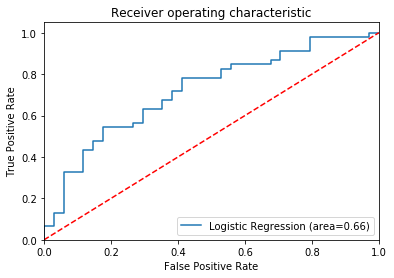

In [9]:
logit_cor_auc=roc_auc_score(y_test,logr.predict(x_test))
fpr,tpr,thresolds=roc_curve(y_test,logr.predict_proba(x_test)[:,1])
pl.figure()
pl.plot(fpr,tpr,label="Logistic Regression (area=%0.2f)"%(logit_cor_auc))
pl.plot([0,1],[0,1],'r--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.05])
pl.xlabel("False Positive Rate")
pl.ylabel("True Positive Rate")
pl.title("Receiver operating characteristic")
pl.legend(loc="lower right")
pl.savefig("log_roc")
pl.show()

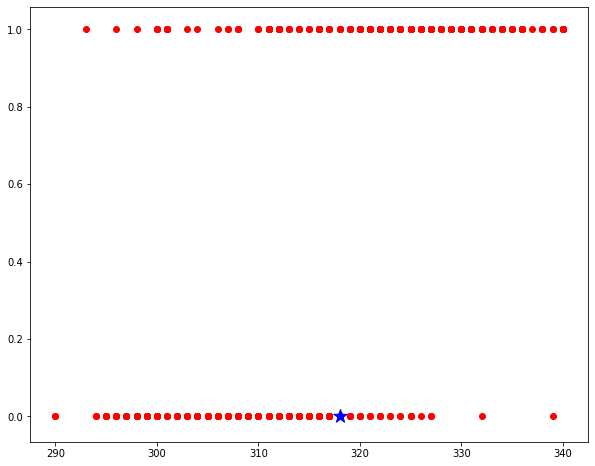

In [85]:
pl.figure(figsize=(10,8))
pl.scatter(dff.loc[:,"GRE_Score"],dff.loc[:,"Research"],marker="o",color="r")
pl.scatter(318,logr.predict([[1,1,1,0,1,1,1]]),color="b",marker="*",s=200)
pl.show()
